# Fase 3 - Análisis

En este notebook vamos a análizar los datos para identificar sentimientos, patrones y percepciones del cliente.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline

In [2]:
filename = '../data/yelp_reviews_cleaned.csv'

In [3]:
df = pd.read_csv(filename)

In [4]:
df.head()

,stars,review,review_clean
0,2,I stopped in between sessions at a conference ...,stop session conference venetian take 30 minut...
1,3,"The Seafarer, like all Southern \""Fish Camps\""...","seafarer like southern \""fish camps\ serve sor..."
2,4,It's normal to travel 370 miles specifically f...,normal travel 370 mile specifically restaurant...
3,2,We went on Saturday night to satiate my cravin...,go saturday night satiate craving good karaoke...
4,1,My husband and I were headed to Mellow Mushroo...,husband head mellow mushroom see sign selwyn a...


## Análisis Exploratorio

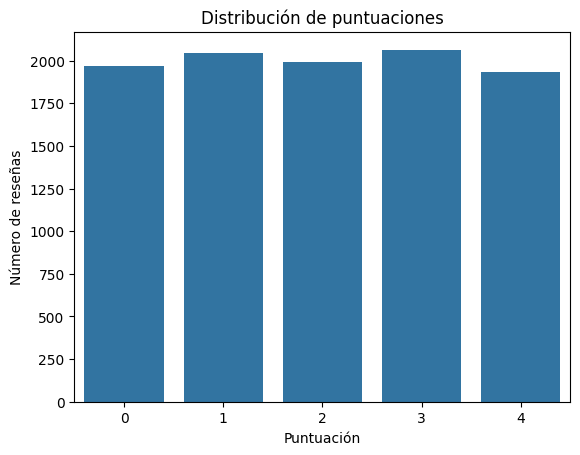

In [5]:
sns.countplot(x='stars', data=df)
plt.title("Distribución de puntuaciones")
plt.xlabel("Puntuación")
plt.ylabel("Número de reseñas")
plt.show()

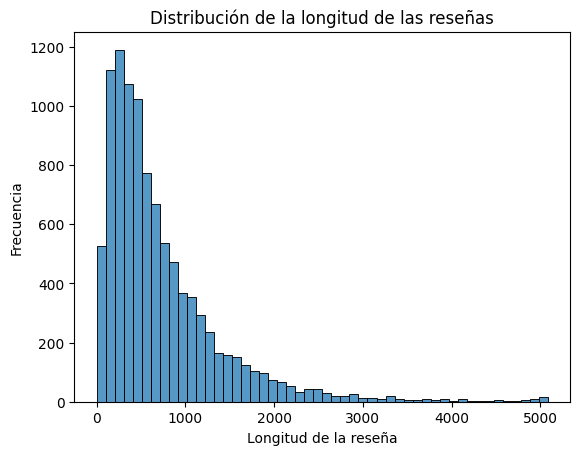

In [6]:
df['review_length'] = df['review'].apply(len)
sns.histplot(df['review_length'], bins=50)
plt.title("Distribución de la longitud de las reseñas")
plt.xlabel("Longitud de la reseña")
plt.ylabel("Frecuencia")
plt.show()

## Análisis de Sentimientos

In [8]:
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

c:\Users\troy_\OneDrive\Documentos\Evolve - Data Science & AI\Analisis-de-Sentimientos-en-Resenyas-de-Yelp\.analisis_yelp\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\troy_\.cache\huggingface\hub\models--distilbert--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.wa

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [9]:
df.head()

,stars,review,review_clean,review_length
0,2,I stopped in between sessions at a conference ...,stop session conference venetian take 30 minut...,638
1,3,"The Seafarer, like all Southern \""Fish Camps\""...","seafarer like southern \""fish camps\ serve sor...",869
2,4,It's normal to travel 370 miles specifically f...,normal travel 370 mile specifically restaurant...,1447
3,2,We went on Saturday night to satiate my cravin...,go saturday night satiate craving good karaoke...,1843
4,1,My husband and I were headed to Mellow Mushroo...,husband head mellow mushroom see sign selwyn a...,2156


In [ ]:
from src.utils import sentiment_classifier
df['sentimiento'] = df['review_clean'].apply(lambda x: sentiment_classifier(x[:512])[0]['label'])

In [28]:
df['sentimiento'] = df['sentimiento'].map({'POSITIVE': 'Positivo', 'NEGATIVE': 'Negativo'})

In [29]:
df.head()

,stars,review,review_clean,review_length,sentimiento
0,2,I stopped in between sessions at a conference ...,stop session conference venetian take 30 minut...,638,Negativo
1,3,"The Seafarer, like all Southern \""Fish Camps\""...","seafarer like southern \""fish camps\ serve sor...",869,Negativo
2,4,It's normal to travel 370 miles specifically f...,normal travel 370 mile specifically restaurant...,1447,Negativo
3,2,We went on Saturday night to satiate my cravin...,go saturday night satiate craving good karaoke...,1843,Negativo
4,1,My husband and I were headed to Mellow Mushroo...,husband head mellow mushroom see sign selwyn a...,2156,Negativo


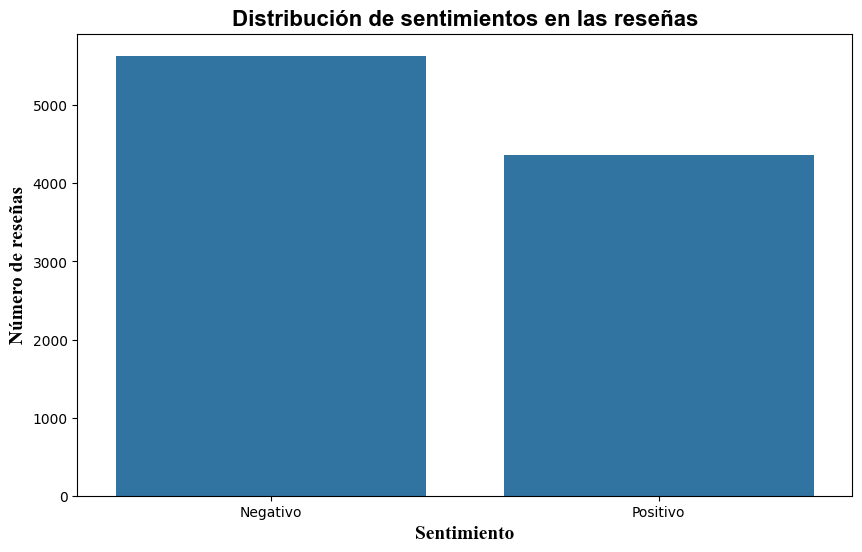

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sentimiento', data=df, order=df['sentimiento'].value_counts().index)
plt.title("Distribución de sentimientos en las reseñas", fontsize=16, fontweight='bold', fontfamily='Arial')
plt.xlabel("Sentimiento", fontsize=14, fontweight='bold', fontfamily='Times New Roman')
plt.ylabel("Número de reseñas", fontsize=14, fontweight='bold', fontfamily='Times New Roman')
plt.show()

## Guardar cambios realizados en los datos para leerlos para la visualización.

In [35]:
output_filename = '../data/yelp_reviews_classified.csv'

df.to_csv(output_filename, index=False)